In [1]:
%load_ext autoreload
%autoreload 2

import funcoes as f
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import yfinance as yf
from pandas_datareader import data as pdr
f.now

'2022-11-01 Tuesday 13:47:55'

In [2]:
strat = f.acceleratingDualMomentum(interval='1MO', momentum='weighted') ## weighted / simple / og
benchmark = f.get60_40()

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  2 of 2 completed


In [3]:
CompareStats = pd.DataFrame(
    f.stats2(strat, 'ret'),
    columns = ['Dual Momentum'],
    index=['Kurtosis', 'Skewness','Max Drawdown','Max Drawdown Date','Annualized Rets','Annualized Vol','Sharpe Ratio', 'Positive Periods']
)

CompareStats['60/40'] = f.stats2(benchmark, 'ret')
CompareStats

Dual Momentum      60/40
Kurtosis               4.182198   4.588272
Skewness               0.728464  -0.599233
Max Drawdown         -11.708318 -30.857252
Max Drawdown Date       2008-04    2008-08
Annualized Rets       35.646064   6.381818
Annualized Vol        13.226519  10.584423
Sharpe Ratio           2.591636   0.499557
Positive Periods      76.744186  63.888889

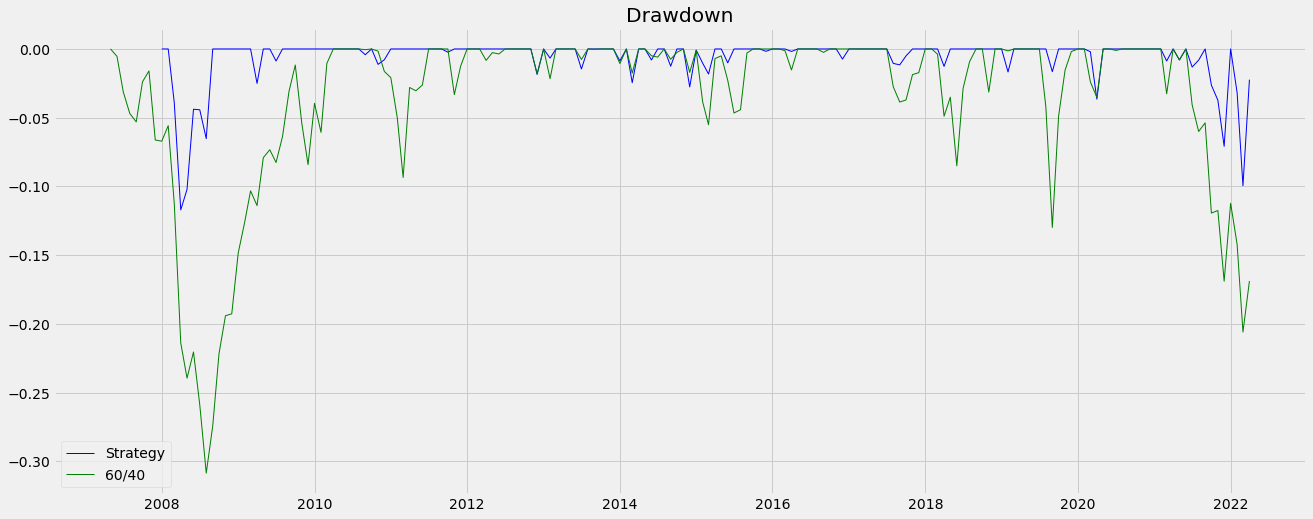

In [4]:
plt.figure(figsize=(20,8))
plt.plot(f.drawdown_DF(strat).index, f.drawdown_DF(strat)['drawdowns'], linewidth=1, color='b', label='Strategy')
plt.plot(f.drawdown_DF(benchmark).index, f.drawdown_DF(benchmark)['drawdowns'], linewidth=1, color='g', label='60/40')
plt.title("Drawdown")
plt.legend()
plt.show;

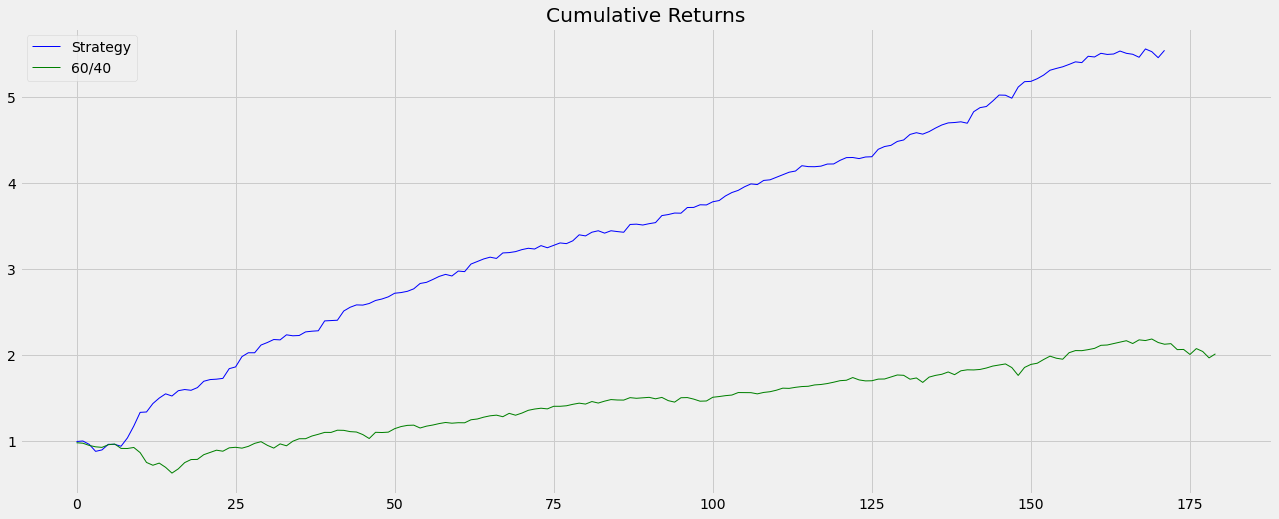

In [5]:
plt.figure(figsize=(20,8))
plt.plot(strat.index, strat['Cumulative Returns'], linewidth=1, color='b', label='Strategy')
plt.plot(benchmark.index, benchmark['Cumulative Returns'], linewidth=1, color='g', label='60/40')
plt.title("Cumulative Returns")
plt.legend()
plt.show;

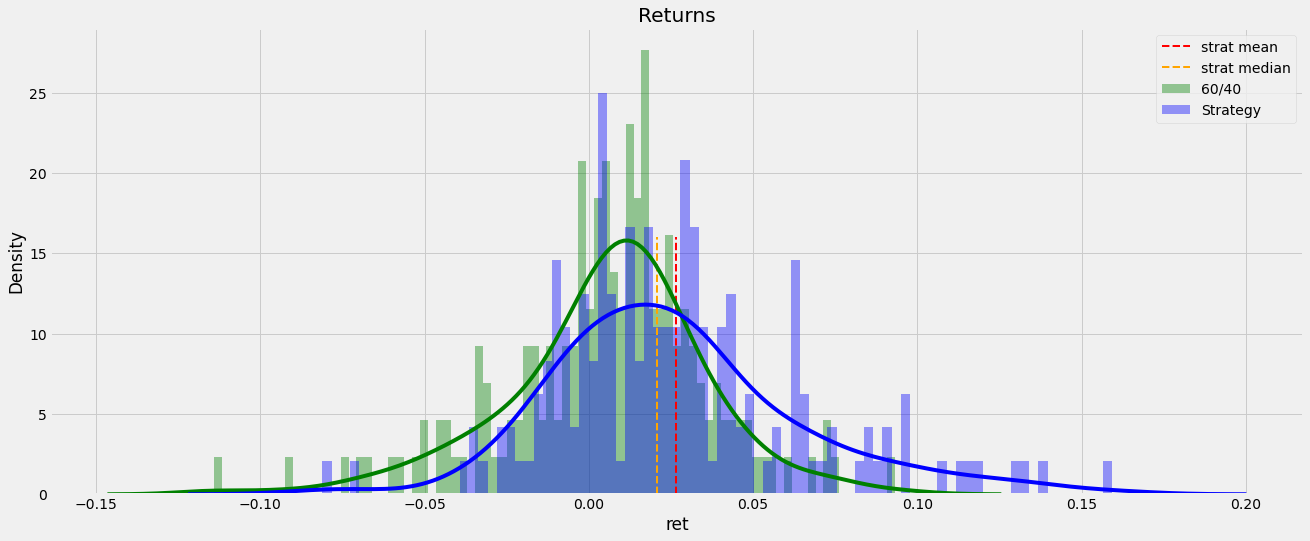

In [6]:
plt.figure(figsize=(20,8))
plt.vlines(strat['ret'].mean(), 0, 16, color='r', linestyle='dashed', linewidth=2,label='strat mean')
plt.vlines(strat['ret'].median(), 0, 16, color='orange', linestyle='dashed', linewidth=2, label='strat median')
sns.distplot(benchmark['ret'], hist=True, bins=int(len(strat['ret'])/2), color='g', label='60/40')
sns.distplot(strat['ret'], hist=True, bins=int(len(strat['ret'])/2), color='b', label='Strategy')
plt.title("Returns")
plt.legend()
plt.show;

In [7]:
# POSITIVE SKEW = MEAN HIGHER THAN MEDIAN 
print('Strategy Skewness: ', f.skewness(strat['ret']))
print('Benchmark Skewness: ', f.skewness(benchmark['ret']))

Strategy Skewness:  0.7284635333228986
Benchmark Skewness:  -0.5992333559795869


In [8]:
# KURTOSIS HIGHER THAN 3 = FAT TAIL DISTRIBUTION
print('Strategy Kurtosis: ', f.kurtosis(strat['ret']))
print('Benchmark Kurtosis: ', f.kurtosis(benchmark['ret']))

Strategy Kurtosis:  4.182197923359564
Benchmark Kurtosis:  4.588272454365926


In [9]:
print('Strategy Compound Growth: ', f.compound(strat['ret']))
print('Benchmark Compound Growth: ', f.compound(benchmark['ret']))

Strategy Compound Growth:  78.03809636503438
Benchmark Compound Growth:  1.5293627706525705


In [10]:
print('Strat Annualized Volatility: ', f.annualize_vol(strat['ret'],12)*100)
print('Benchmark Annualized Volatility: ', f.annualize_vol(benchmark['ret'],12)*100)

Strat Annualized Volatility:  13.226519246135277
Benchmark Annualized Volatility:  10.584422597977563


In [11]:
print('Strat Annualized Return: ', f.annualize_rets(strat['ret'], 12)*100)
print('Benchmark Annualized Return: ', f.annualize_rets(benchmark['ret'], 12)*100)

Strat Annualized Return:  35.64606375302244
Benchmark Annualized Return:  6.381818062618327


In [12]:
rfr = f.riskFreeRate()
print('Strat Sharpe Ratio: ', f.sharpe_ratio(strat['ret'], rfr, 12))
print('Benchmark Sharpe Ratio: ', f.sharpe_ratio(benchmark['ret'], rfr, 12))

Strat Sharpe Ratio:  2.5916360945047567
Benchmark Sharpe Ratio:  0.4995574303613763


In [13]:
## Jarque-Bera Test
print('Are Returns Normally Distribuited? ', f.is_normal(strat['ret'], 0.01))
print('Are Returns Normally Distribuited? ', f.is_normal(benchmark['ret'], 0.01))

Are Returns Normally Distribuited?  False
Are Returns Normally Distribuited?  False


In [14]:
dd_strat = f.drawdown_DF(strat)
dd_bm = f.drawdown_DF(benchmark[-len(strat):])
dd_strat

wealth_index  previous_peaks  drawdowns
Date                                                              
2008-01-01 00:00:00-05:00    994.900105      994.900105   0.000000
2008-02-01 00:00:00-05:00   1000.617617     1000.617617   0.000000
2008-03-01 00:00:00-05:00    961.448006     1000.617617  -0.039145
2008-04-01 00:00:00-04:00    883.462127     1000.617617  -0.117083
2008-05-01 00:00:00-04:00    898.303577     1000.617617  -0.102251
...                                 ...             ...        ...
2021-12-01 00:00:00-05:00  73709.455662    79327.394670  -0.070820
2022-01-01 00:00:00-05:00  80844.896883    80844.896883   0.000000
2022-02-01 00:00:00-05:00  78279.182777    80844.896883  -0.031736
2022-03-01 00:00:00-05:00  72798.046305    80844.896883  -0.099534
2022-04-01 00:00:00-04:00  79038.096365    80844.896883  -0.022349

[172 rows x 3 columns]

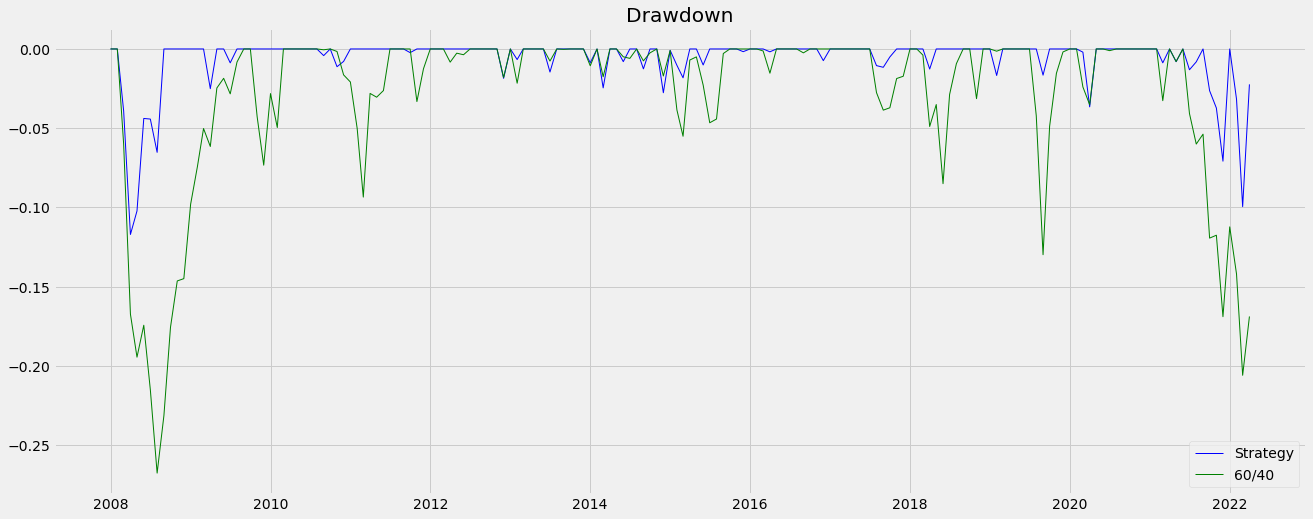

In [15]:
plt.figure(figsize=(20,8))
plt.plot(dd_strat.index, dd_strat['drawdowns'], linewidth=1, color='b', label='Strategy')
plt.plot(dd_bm.index, dd_bm['drawdowns'], linewidth=1, color='g', label='60/40')
plt.title("Drawdown")
plt.legend()
plt.show;

In [16]:
## Upwards volatility is not worrying, therefore there is Semi-Deviation to only account for below-average returns
## Semi-Deviation is the volatility of a sub-sample of below-average or below-zero returns.
print('Strategy Semi Deviation: ', f.semideviation(strat['ret'])*100)
print('Benchmark Semi Deviation: ', f.semideviation(benchmark['ret'])*100)

Strategy Semi Deviation:  1.6992010094271717
Benchmark Semi Deviation:  2.3765756695377758


In [17]:
# Returns the historic Value at Risk at a specified level
# i.e. returns the number such that "level" percent of the returns
# fall below that number, and the (100-level) percent are above
print('Strategy Historic VaR: ', f.var_historic(strat['ret'], level=5)*100)
print('Benchmark Historic VaR: ', f.var_historic(benchmark['ret'], level=5)*100)

Strategy Historic VaR:  2.479761906720686
Benchmark Historic VaR:  4.943430965580538


In [18]:
print('Strategy CVar: ',f.cvar_historic(strat['ret'], level=5)*100)
print('Benchmark CVar: ',f.cvar_historic(benchmark['ret'], level=5)*100)

Strategy CVar:  4.116258087066246
Benchmark CVar:  7.0843587472788085


In [19]:
print('Strategy Guassian VaR: ', f.var_gaussian(strat['ret'], level=5)*100)
print('Benchmark Guassian VaR: ', f.var_gaussian(benchmark['ret'], level=5)*100)

Strategy Guassian VaR:  3.6193337516095214
Benchmark Guassian VaR:  4.448126278449873


In [20]:
CompareStats = pd.DataFrame(
    f.stats2(strat, 'ret'),
    columns = ['Dual Momentum'],
    index=['Kurtosis', 'Skewness','Max Drawdown','Max Drawdown Date','Annualized Rets','Annualized Vol','Sharpe Ratio', 'Positive Periods']
)

CompareStats['60/40'] = f.stats2(benchmark, 'ret')
CompareStats

Dual Momentum      60/40
Kurtosis               4.182198   4.588272
Skewness               0.728464  -0.599233
Max Drawdown         -11.708318 -30.857252
Max Drawdown Date       2008-04    2008-08
Annualized Rets       35.646064   6.381818
Annualized Vol        13.226519  10.584423
Sharpe Ratio           2.591636   0.499557
Positive Periods      76.744186  63.888889